In [106]:
# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import random_noise
import glob
import math 

In [107]:
def get_filter(filter_name):
	"""
	Defines all used filters
	Returns the requested filter
	Paremeters:
  -----------
	filter_name: name of the filter
	"""
	if filter_name == "sobelx":
		return np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
	elif filter_name == "sobely":
		return np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

	elif filter_name == "sobel5x":
		return np.array([[-1,-4,-6,-4,-1],[-2,-8,-12,-8,-2],[0,0,0,0,0],[2,8,12,8,2],[1,4,6,4,1]])
	elif filter_name == "sobel5y":
		return np.array([[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6],[4,8,0,-8,-4],[1,2,0,-2,-1]])
	
	elif filter_name == "modified_sobelx":
		return np.array([[2,1,0],[1,0,-1],[0,-1,-2]])
	elif filter_name == "modified_sobely":
		return np.array([[0,1,2],[-1,0,1],[-2,-1,0]])

	elif filter_name == "prewittx":
		return np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
	elif filter_name == "prewitty":
		return np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
	elif filter_name == "prewitt5x":
		return np.array([[-2,-2,-2,-2,-2],[-1,-1,-1,-1,-1],[0,0,0,0,0],[1,1,1,1,1],[2,2,2,2,2]])
	elif filter_name == "prewitt5y":
		return np.array([[2,1,0,-1,-2],[2,1,0,-1,-2],[2,1,0,-1,-2],[2,1,0,-1,-2],[2,1,0,-1,-2]])
	
	elif filter_name == "modified_prewitt5x":
		return np.array([[-2,-2,-2,-2,-2],[-1,-1,-1,-1,-1],[0,0,0,0,0],[1,1,1,1,1],[2,2,2,2,2]])
	elif filter_name == "modified_prewitt5y":
		return np.array([[2,1,0,-1,-2],[2,1,0,-1,-2],[2,1,0,-1,-2],[2,1,0,-1,-2],[2,1,0,-1,-2]])
	
	elif filter_name == "scharrx":
		return np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
	elif filter_name == "scharry":
		return np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
	
	elif filter_name == "scharr5x":
		return np.array([[-1,-2,-3,-2,-1],[-1,-2,-6,-2,-1],[0,0,0,0,0],[1,2,6,2,1],[1,2,3,2,1]])
	elif filter_name == "scharr5y":
		return np.array([[1,1,0,-1,-1],[2,2,0,-2,-2],[3,6,0,-6,-3],[2,2,0,-2,-2],[1,1,0,-1,-1]])
	
	elif filter_name == "kirschx":
		return np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])
	elif filter_name == "kirschy":
		return np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
	
	elif filter_name == "kirsch5x":
		return np.array([[-7,-7,-7,-7,-7],[-7,-3,-3,-3,-7],[-7,-3,0,-3,-7],[9,5,5,5,9],[9,9,9,9,9]])
	elif filter_name == "kirsch5y":
		return np.array([[9,9,-7,-7,-7],[9,5,-3,-3,-7],[9,5,0,-3,-7],[9,5,-3,-3,-7],[9,9,-7,-7,-7]])
	
	elif filter_name == "frei_chenx":
		return np.array([[-1,-math.sqrt(2),-1],[0,0,0],[1,math.sqrt(2),1]])
	elif filter_name == "frei_cheny":
		return np.array([[1,0,-1],[math.sqrt(2),0,-math.sqrt(2)],[1,0,-1]])

	elif filter_name == "robert_crossx":
		return np.array([[1,0],[0,-1]])
	elif filter_name == "robert_crossy":
		return np.array([[0,-1],[1,0]])

	elif filter_name == "laplacex":
		return np.array([[1],[-2],[1]])
	elif filter_name == "laplacey":
		return np.array([[1,-2,1]])
	else:
		raise TypeError("Unknown filter")

In [108]:
def abs_sobel_thresh(img, filter_name="sobelx", thresh_min=0, thresh_max=255):
	'''
	Returns x gradient or y gradient for
	a given kernel and threshold
	values
	Paremeters:
	-----------
	img: image matrix 

	filter_name: used filter name, default filter sobelx

	thresh_min, thresh_max : Inclusive threshold of image matrix
	                           Default values are 0,255 respectively
	'''
	# Convert to grayscale
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	# Apply gradient with the OpenCV filter2D function
	 
	abs_sobel = np.absolute(cv2.filter2D(gray, cv2.CV_64F, get_filter(filter_name)))
	# Rescale back to 8 bit integer
	scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
	
	# Create a copy and apply the threshold
	binary_output = np.zeros_like(scaled_sobel)
	# Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
	binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

	# Return the result
	return binary_output

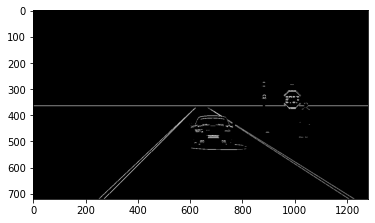

In [109]:
# TEST 
img2 = plt.imread("test/test3.jpg")
val = abs_sobel_thresh(img2,filter_name="sobelx",thresh_max=150,thresh_min=50)

plt.figure()
plt.imshow(val,cmap="gray")

In [110]:
def mag_thresh(img, filter=("sobelx","sobely"),mag_thresh=(30, 100)):
  """
  Returns binary matrix based on gradient magnitude for a
  given filter and threshold values
  Paremeters:
  -----------
  img: image matrix 
  
  filter: (filter-x, filter-y)
  
  mag_thresh : Inclusive threshold of image matrix
	                           Default value (30, 100)
  """
	# Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	# Take both x and y gradients of the filter
  sobelx = cv2.filter2D(gray, cv2.CV_64F, get_filter(filter[0]))
  sobely = cv2.filter2D(gray, cv2.CV_64F, get_filter(filter[1]))
  
	# Calculate the gradient magnitude
  gradmag = np.sqrt(sobelx**2 + sobely**2)
	# Rescale to 8 bit
  scale_factor = np.max(gradmag)/255
  gradmag = (gradmag/scale_factor).astype(np.uint8)
	# Create a binary image of ones where threshold is met, zeros otherwise
  binary_output = np.zeros_like(gradmag)
  binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

	# Return the binary image
  return binary_output

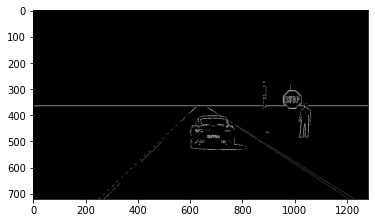

In [111]:
# TEST 
img3 = plt.imread("test/test3.jpg")
val = mag_thresh(img3,filter=["sobelx","sobely"], mag_thresh=(50,100))

plt.figure()
plt.imshow(val,cmap="gray")

In [112]:
def dir_threshold(img, filter_name_x,filter_name_y, thresh=(0, np.pi/2)):
	"""
  Returns binary matrix based on gradient direction for a
  given filter and threshold values
	Paremeters:
  -----------
  img: image matrix 
  
	filter_name_x: filter for x gradient
	
	filter_name_y: filter for y gradient
	
  thresh : Inclusive threshold of image matrix
	                           Default value (0, np.pi/2)
  """
	# Convert to grayscale
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	# Calculate the x and y gradients
	sobelx = cv2.filter2D(gray, cv2.CV_64F, get_filter(filter_name_x))
	sobely = cv2.filter2D(gray, cv2.CV_64F, get_filter(filter_name_x))
	# Take the absolute value of the gradient direction,
	# apply a threshold, and create a binary image result
	absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
	binary_output =  np.zeros_like(absgraddir)
	binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

	# Return the binary image
	return binary_output

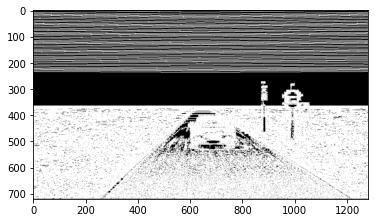

In [113]:
# TEST 
img3 = plt.imread("test/test3.jpg")
val = dir_threshold(img3,filter_name_x="sobelx",filter_name_y = "sobely", thresh=(0.7, 1.3))

plt.figure()
plt.imshow(val,cmap="gray")

In [114]:
def hls_thresh(img, thresh=(100, 255)):
	"""
	Convert RGB to HLS and threshold to binary image using S channel
  Paremeters:
  -----------
  img:image matrix 
  
  thresh :Inclusive threshold of image matrix
          Default value [100, 255]
	"""
	hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
	s_channel = hls[:,:,2]
	binary_output = np.zeros_like(s_channel)
	binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
	return binary_output

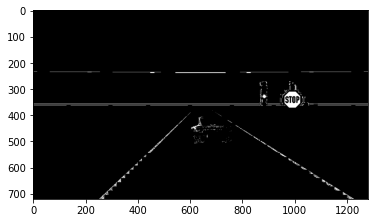

In [115]:
# TEST 
img3 = plt.imread("test/test3.jpg")
val = hls_thresh(img3,thresh=(170, 255))

plt.figure()
plt.imshow(val,cmap="gray")

In [119]:
def combined_thresh(img, filter_x,filter_y):
  '''
  Applies all the pre-processing to the image and 
  Returns binary matrix with pixels who are contestent for edge
  Paremeters:
  -----------
  img:image matrix 

  filter_x: filter for x gradient
	
	filter_y: filter for y gradient
  '''
  gradx = abs_sobel_thresh(img, filter_x, thresh_min=15, thresh_max=150)
  grady = abs_sobel_thresh(img, filter_y, thresh_min=30, thresh_max=150)
  mag_binary = mag_thresh(img, filter=(filter_x, filter_y), mag_thresh=(100, 250))
  dir_binary = dir_threshold(img, filter_name_x=filter_x, filter_name_y=filter_y, thresh=(0.7, 1.3))
  hls_bin = hls_thresh(img, thresh=(100, 255))

  combined = np.zeros_like(mag_binary)
  combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | hls_bin == 1 ] = 1

  return combined

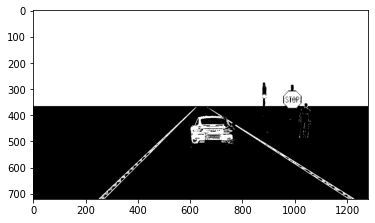

In [120]:
# TEST 
img3 = plt.imread("test/test3.jpg")
val = combined_thresh(img3,filter_x="sobelx",filter_y="sobely")

plt.figure()
plt.imshow(val,cmap="gray")

In [126]:
def wrap(img):
  """
  Returns prospective transformed image
  Paremeters:
  -----------
  img:image matrix
  """
  img_size = (img.shape[1],img.shape[0])
  src =  np.float32([[250,700],[1200,700],[550,450],[750,450]])
  dst = np.float32([[250,700],[1000,700],[250,50],[700,50]])
  M = cv2.getPerspectiveTransform(src,dst)

  warped = cv2.warpPerspective(img,M,img_size,flags=cv2.INTER_LINEAR)
  return warped

In [127]:
src =  np.float32([[250,700],[1200,700],[550,450],[750,450]])
dst = np.float32([[250,700],[1000,700],[250,50],[700,50]])
# reverse prospective transform
Minv= cv2.getPerspectiveTransform(dst,src)

ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

In [128]:
def findLines(image, filter_name_x, filter_name_y, nwindows=9, margin=110, minpix=50):
    """
    Find the polynomial representation of the lines in the `image` using:
    - `nwindows` as the number of windows.
    - `margin` as the windows margin.
    - `minpix` as minimum number of pixes found to recenter the window.
    - `ym_per_pix` meters per pixel on Y.
    - `xm_per_pix` meters per pixels on X.
    
    Returns (left_fit, right_fit, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy)
    """    
    # Make a binary and transform image
    # binary_warped = wrap(combined_thresh(image))
    binary_warped = wrap(combined_thresh(image, filter_x = filter_name_x, filter_y = filter_name_y))
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    
    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Fit a second order polynomial to each
    left_fit_m = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_m = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
    return (left_fit, right_fit, left_fit_m, right_fit_m, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy)

In [129]:
def visualizeLanes(image, ax):
    """
    Visualize the windows and fitted lines for `image`.
    Returns (`left_fit` and `right_fit`)
    """
    left_fit, right_fit, left_fit_m, right_fit_m, left_lane_inds, right_lane_inds, out_img, nonzerox, nonzeroy = findLines(image)
    # Visualization
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    ax.imshow(out_img)
    ax.plot(left_fitx, ploty, color='yellow')
    ax.plot(right_fitx, ploty, color='yellow')
    return ( left_fit, right_fit, left_fit_m, right_fit_m )

In [130]:
def showLaneOnImages(images, cols = 2, rows = 3, figsize=(15,13)):
    """
    Display `images` on a [`cols`, `rows`] subplot grid.
    Returns a collection with the image paths and the left and right polynomials.
    """
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    imageAndFit = []
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            imagePathName, image = images[index]
            left_fit, right_fit, left_fit_m, right_fit_m = visualizeLanes(image, ax)
            ax.set_title(imagePathName)
            ax.axis('off')
            imageAndFit.append( ( imagePathName, left_fit, right_fit, left_fit_m, right_fit_m ) )
    return imageAndFit

In [131]:
def calculateCurvature(yRange, left_fit_cr):
    """
    Returns the curvature of the polynomial `fit` on the y range `yRange`.
    """
    
    return ((1 + (2*left_fit_cr[0]*yRange*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])

In [132]:
def drawLine(img, left_fit, right_fit):
    """
    Draw the lane lines on the image `img` using the poly `left_fit` and `right_fit`.
    """
    yMax = img.shape[0]
    ploty = np.linspace(0, yMax - 1, yMax)
    color_warp = np.zeros_like(img).astype(np.uint8)
    
    # Calculate points.
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    return cv2.addWeighted(img, 1, newwarp, 0.3, 0)

In [134]:
# def pipeline(img):  
def pipeline(img, filter_x, filter_y):   
    """
    Returns annotated output image
    Paremeters:
    -----------
    img:image matrix

    filter_x: filter for x gradient
	
	  filter_y: filter for y gradient
    """ 
    left_fit, right_fit, left_fit_m, right_fit_m, _, _, _, _, _ = findLines(img, filter_x, filter_y)
    yRange = 719
    leftCurvature = calculateCurvature(yRange, left_fit_m) / 1000
    rightCurvature = calculateCurvature(yRange, right_fit_m) / 1000
    output = drawLine(img, left_fit, right_fit)
    cv2.putText(output, 'Left Radius:', (10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
    cv2.putText(output, str(leftCurvature), (220,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
    cv2.putText(output, 'Right Radius:', (10,60),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
    cv2.putText(output, str(rightCurvature), (220,60),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0))
    return cv2.cvtColor( output, cv2.COLOR_BGR2RGB )

In [135]:
# list of all the filters list of touple of (x axis filter name, y axis filter name, filter name)
filter_list = [
               ("sobelx","sobely","Sobel Filter, kernal size=3"),
               ("sobel5x","sobel5y", "Sobel Filter, kernal size=5"),
               ("modified_sobelx","modified_sobely", "Modified Sobel Filter, kernal size=3"),
               ("prewittx","prewitty", "Prewitt Filter, kernal size=3"),
               ("prewitt5x","prewitt5y", "Prewitt Filter, kernal size=5"),
               ("modified_prewitt5x","modified_prewitt5y", "Modified Prewitt Filter, kernal size=5"),
               ("scharrx","scharry","Scharr Filter, kernal size=3"),
               ("scharr5x","scharr5y", "Scharr Filter, kernal size=5"),
               ("kirschx","kirschx","Kirsch Filter, kernal size=3"),
               ("kirsch5x","kirsch5y", "Kirsch Filter, kernal size=5"),
               ("frei_chenx","frei_cheny","Frei-Chen Filter, kernal size=3"),
               ("robert_crossx","robert_crossy", "Robert Cross Filter, kernal size=2"),
               ("laplacex","laplacey","Laplace Filter, kernal size=3")
]

In [136]:
def detect_lane(img_path,filters,noise):
  # open origial image
  img = plt.imread(img_path)
  # show original image
  if noise == True:
    fig = plt.figure(figsize=(25, 12))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(img)

    img = random_noise(img, mode='s&p',amount=0.3)
    img = np.array(255*img, dtype = 'uint8')
    plt.subplot(1,2,2)
    plt.title("Original Image with Noise")
    plt.axis('off')
    plt.imshow(img)
  else:
    plt.figure()
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(img)
  # show lane detected images
  fig = plt.figure(figsize=(25, 12))
  for index,filter_name in enumerate(filters):
    detected_img = pipeline(img, filter_name[0], filter_name[1])
    detected_img =  cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(np.ceil(len(filters)/3),3,index+1)
    plt.title(filter_name[2])
    plt.axis('off')
    plt.imshow(detected_img)
  plt.tight_layout()
  plt.show()

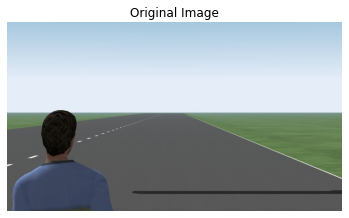

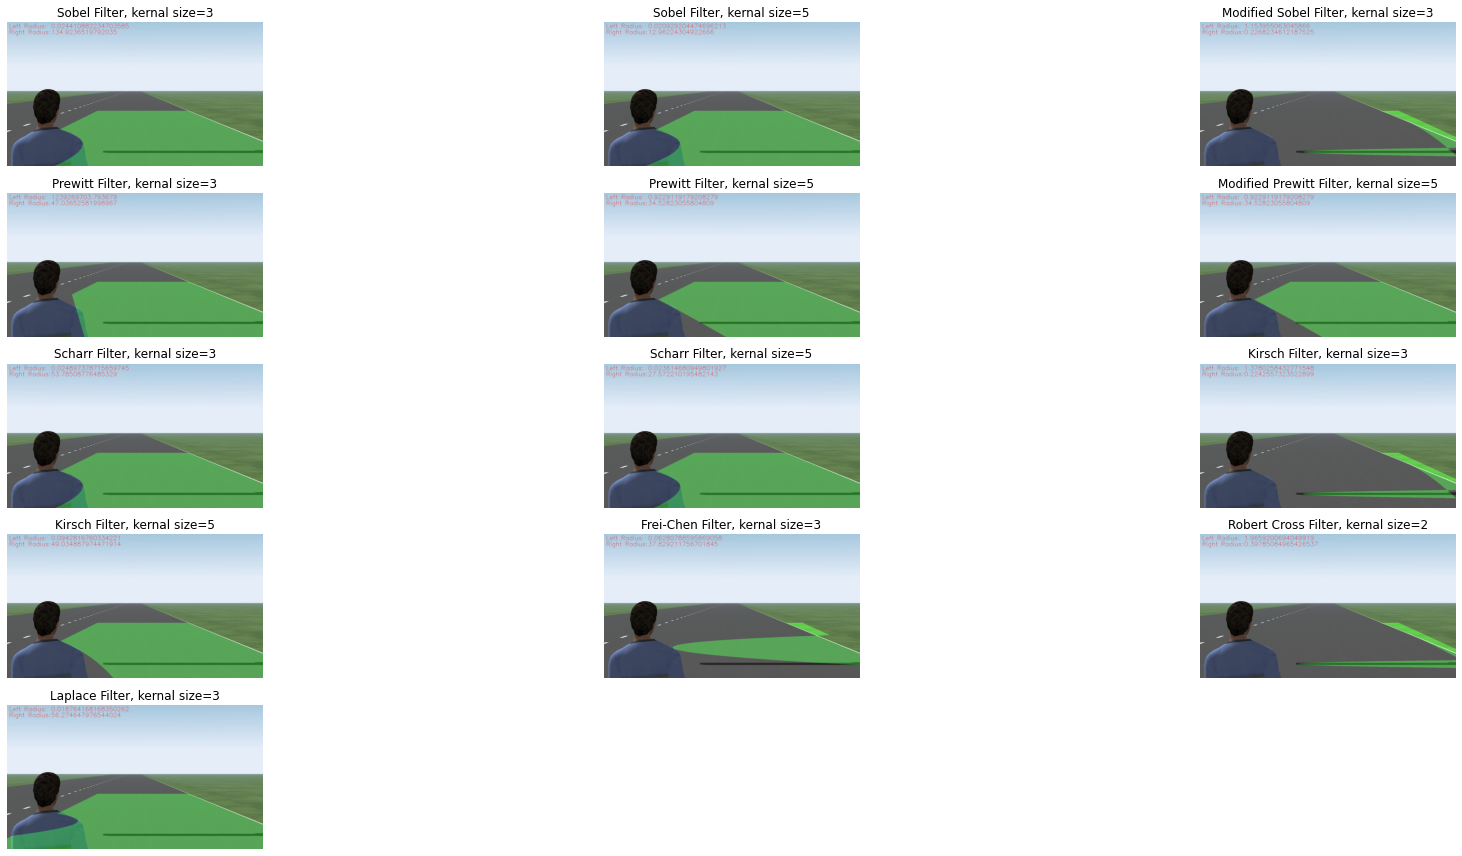

In [138]:
# Test single image
detect_lane("test/test5.jpg",filter_list,False)

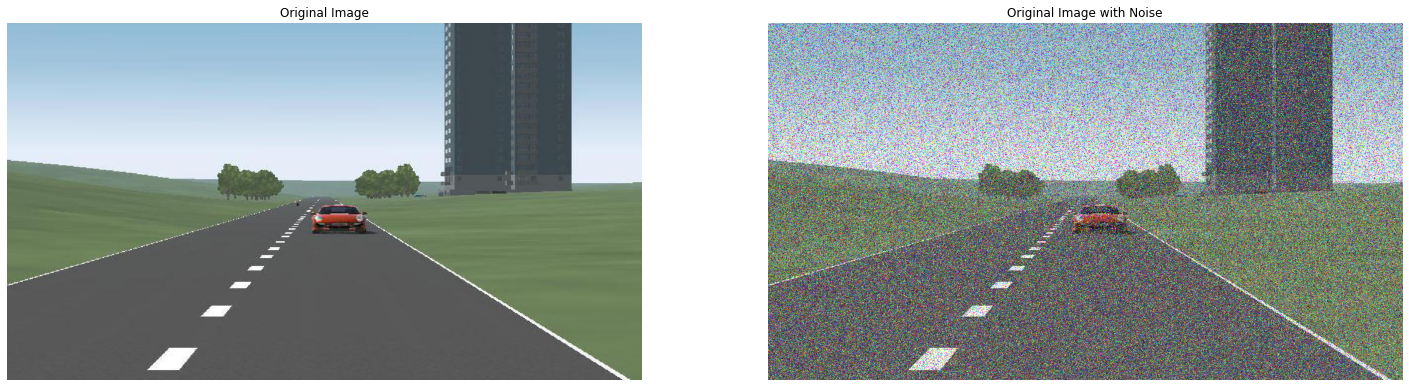

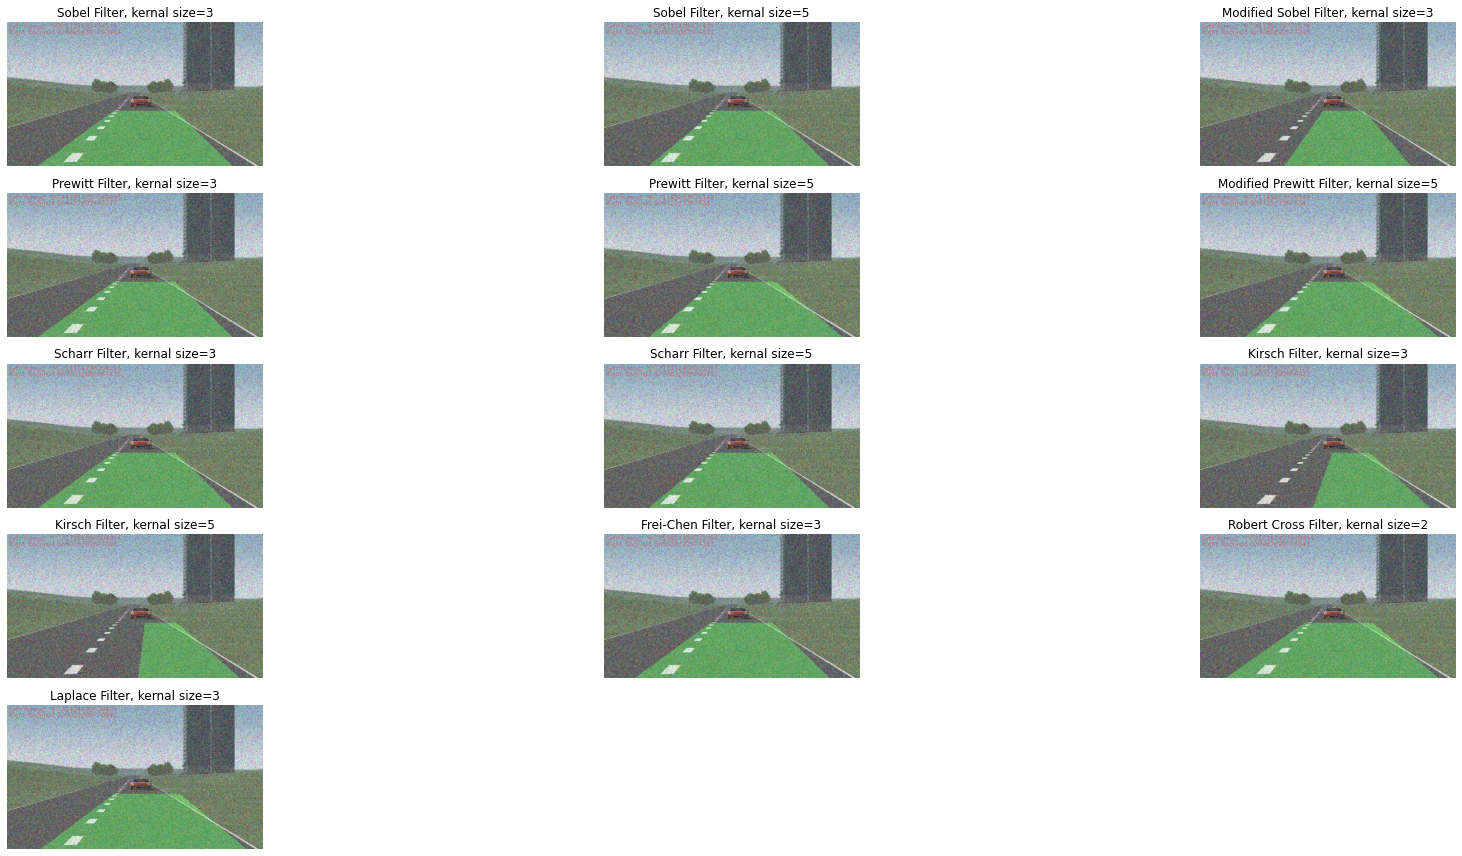

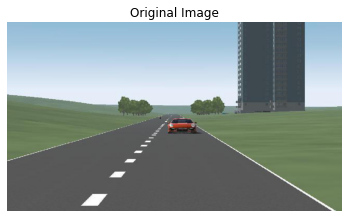

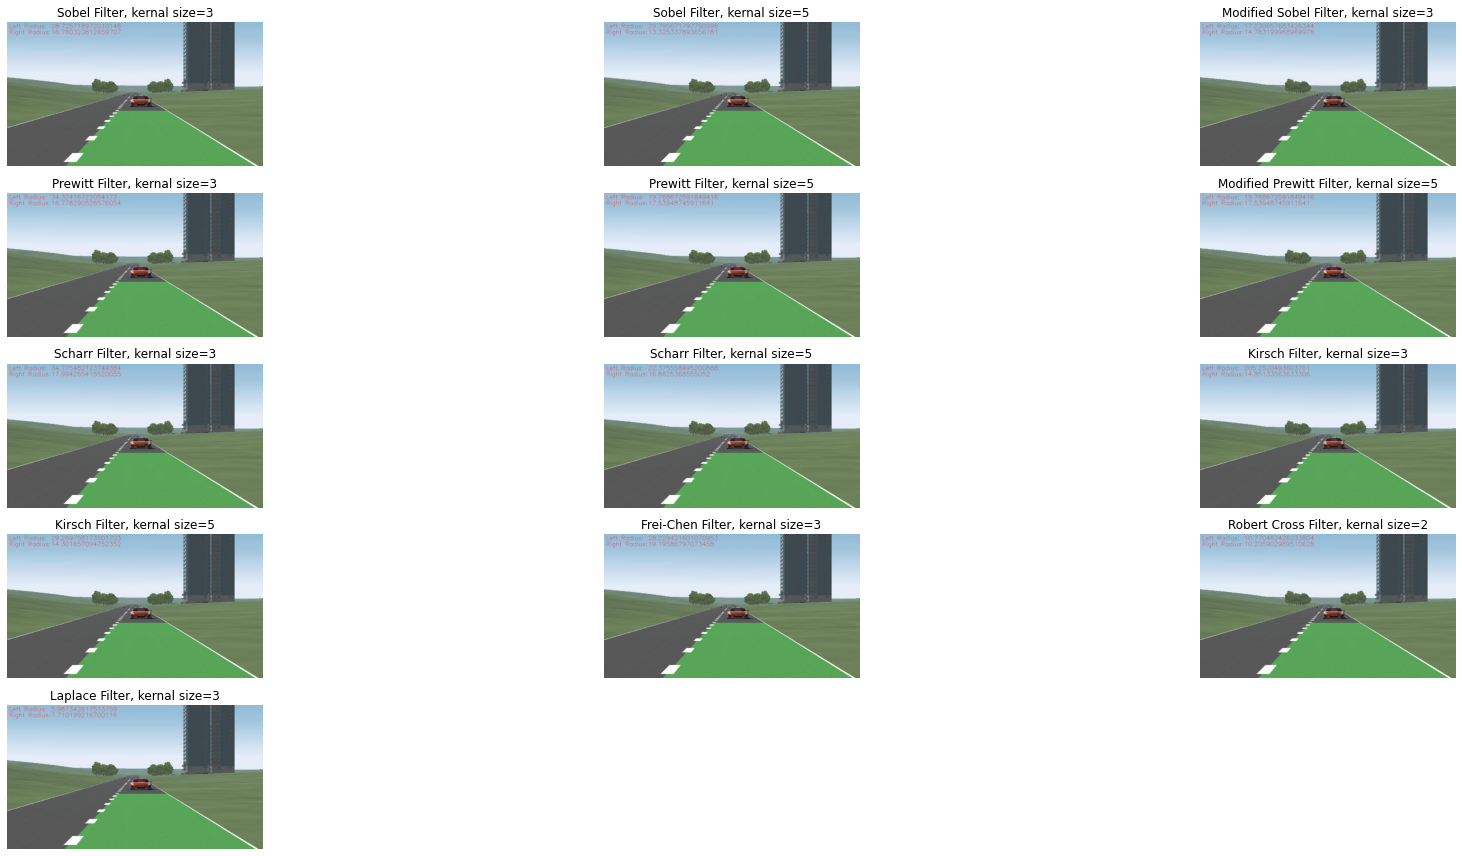

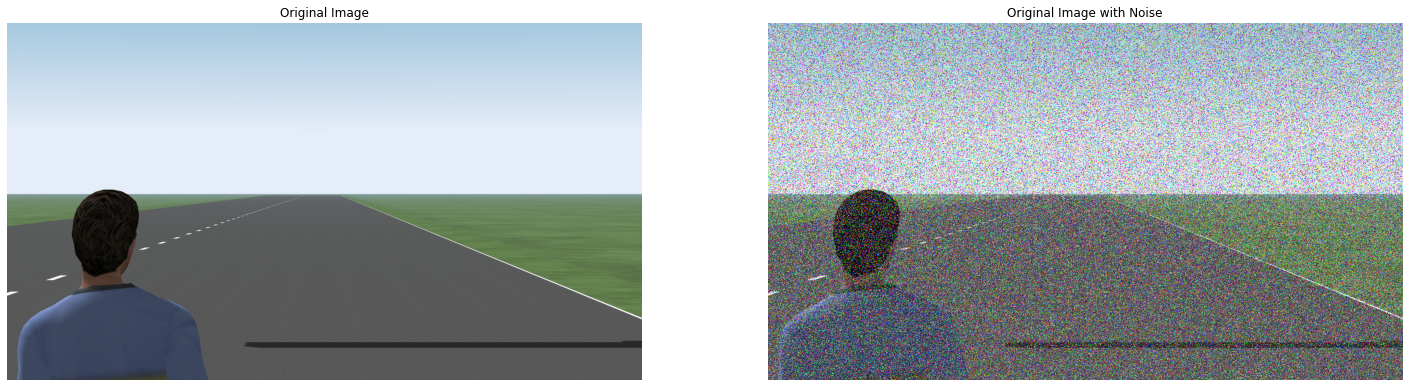

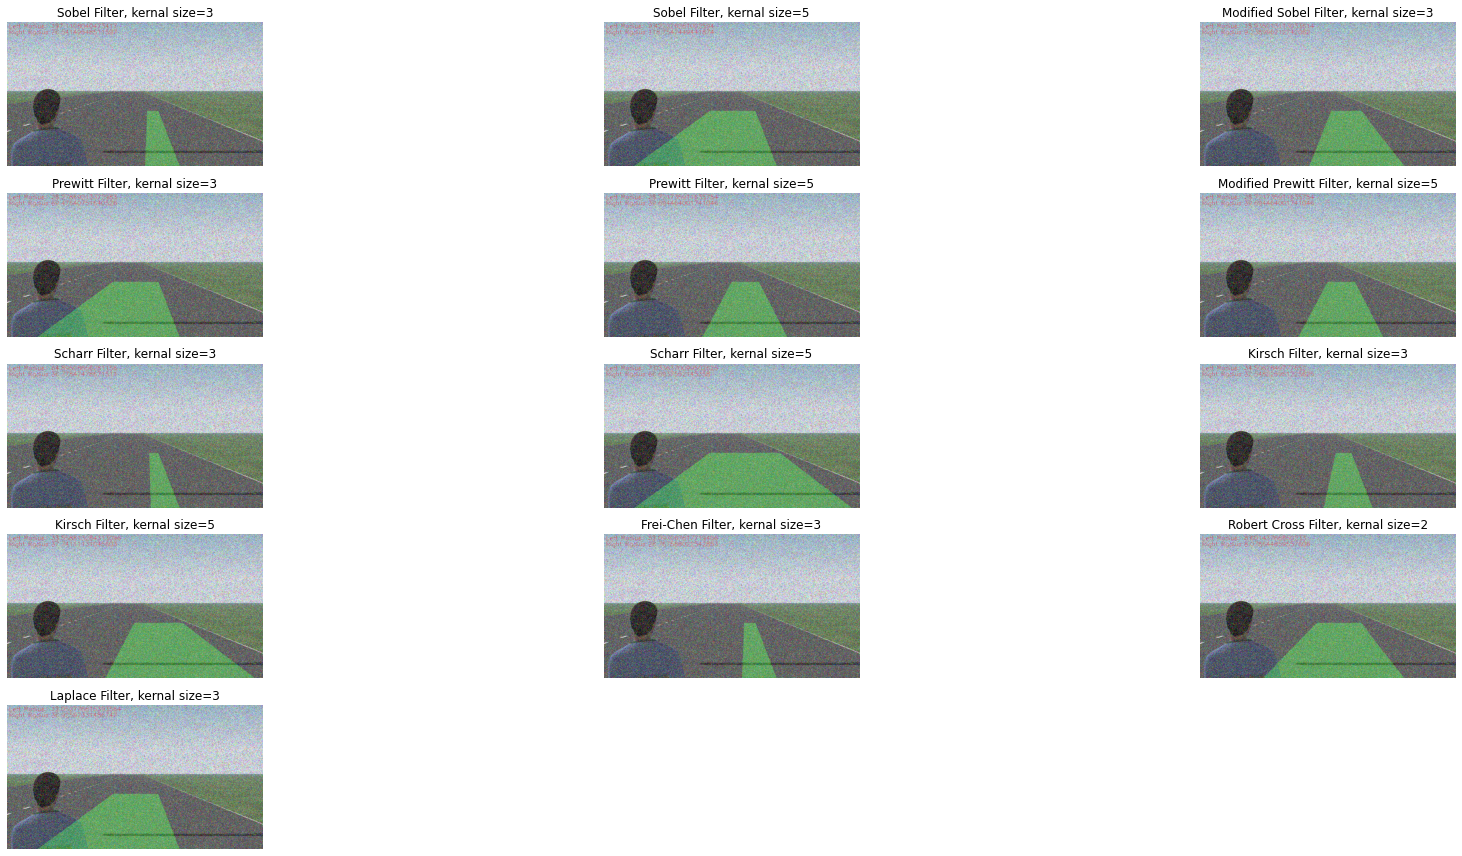

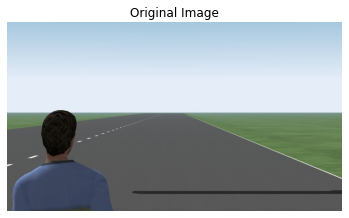

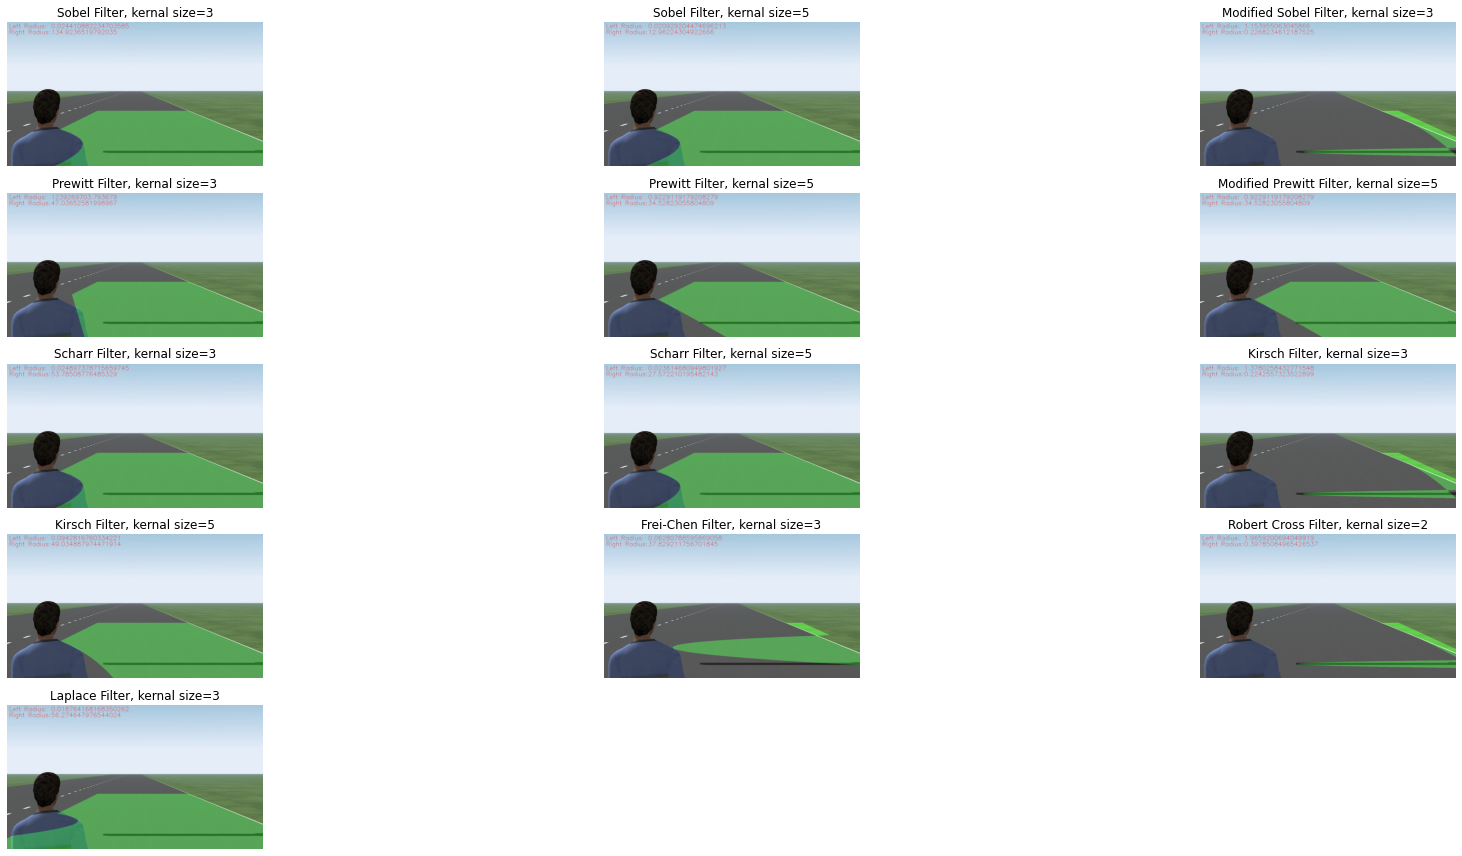

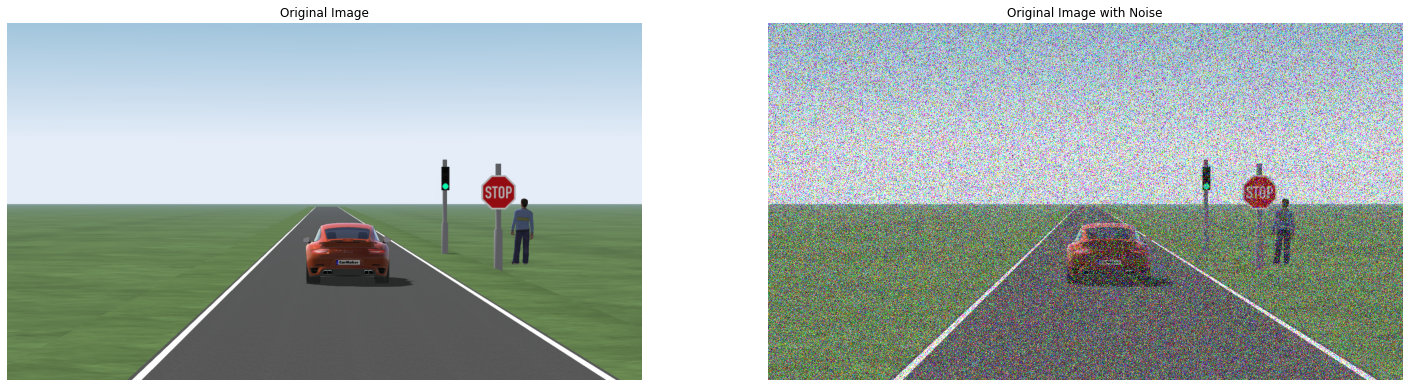

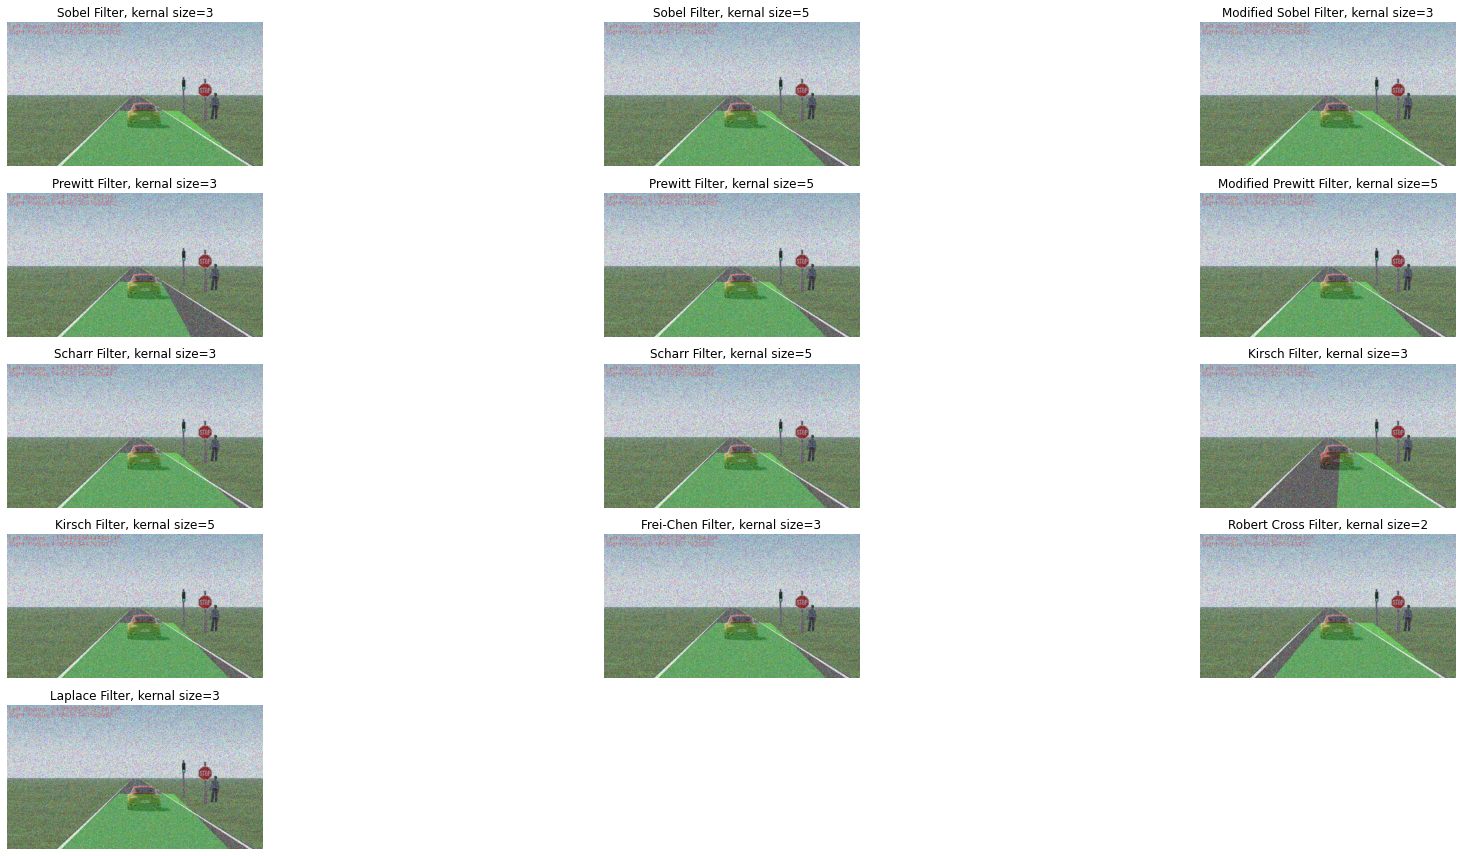

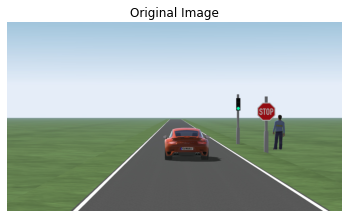

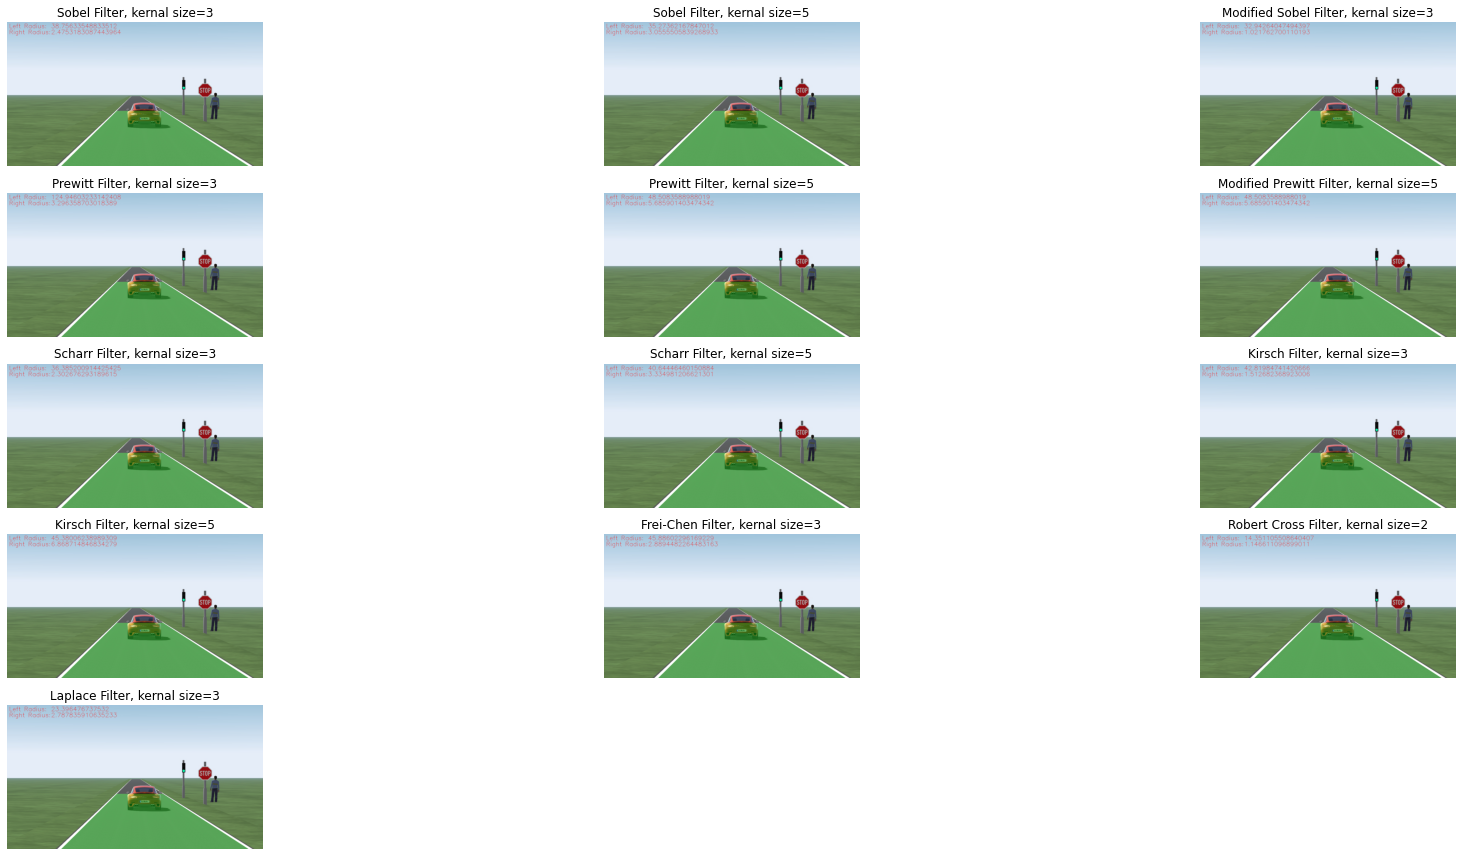

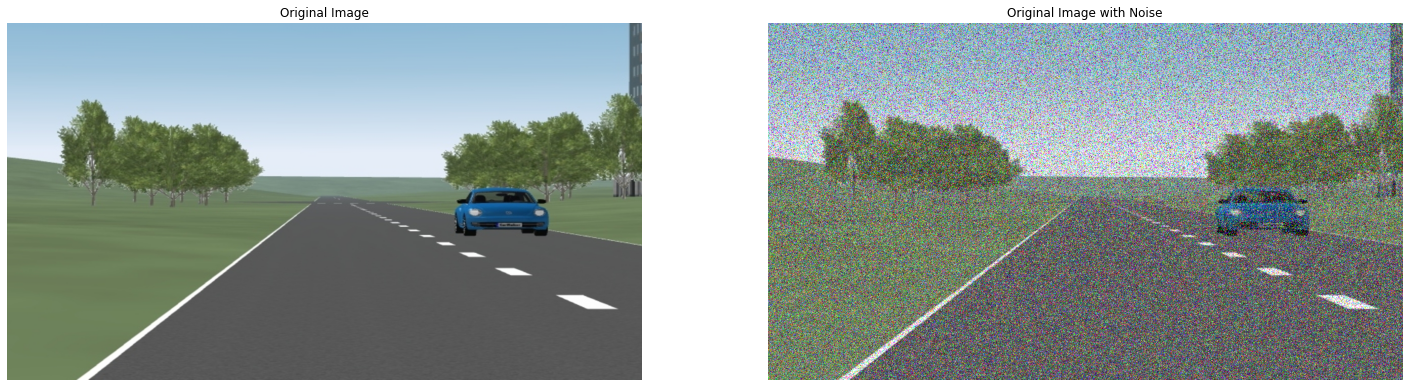

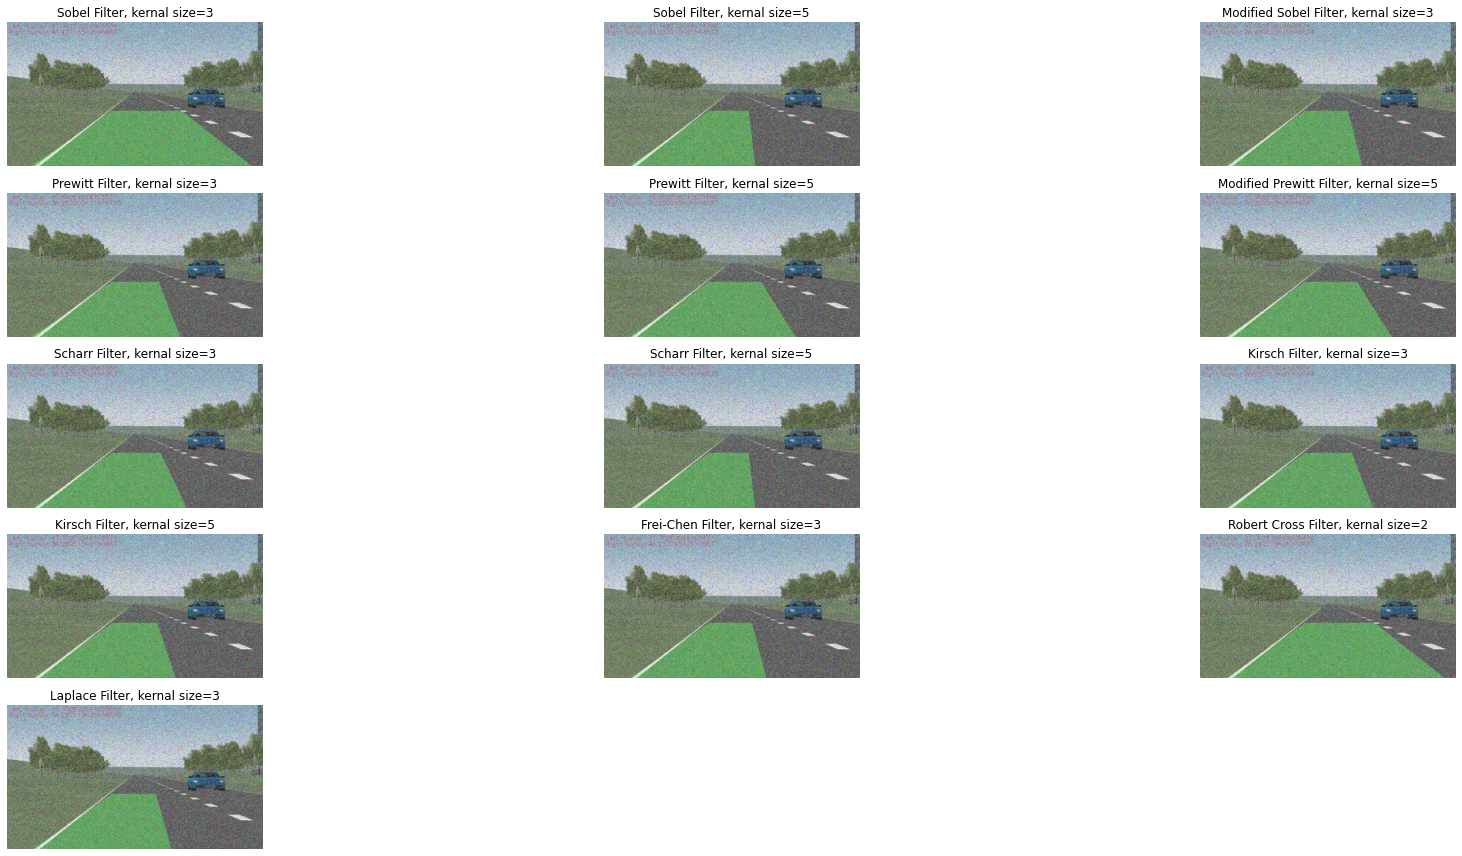

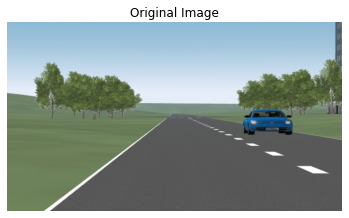

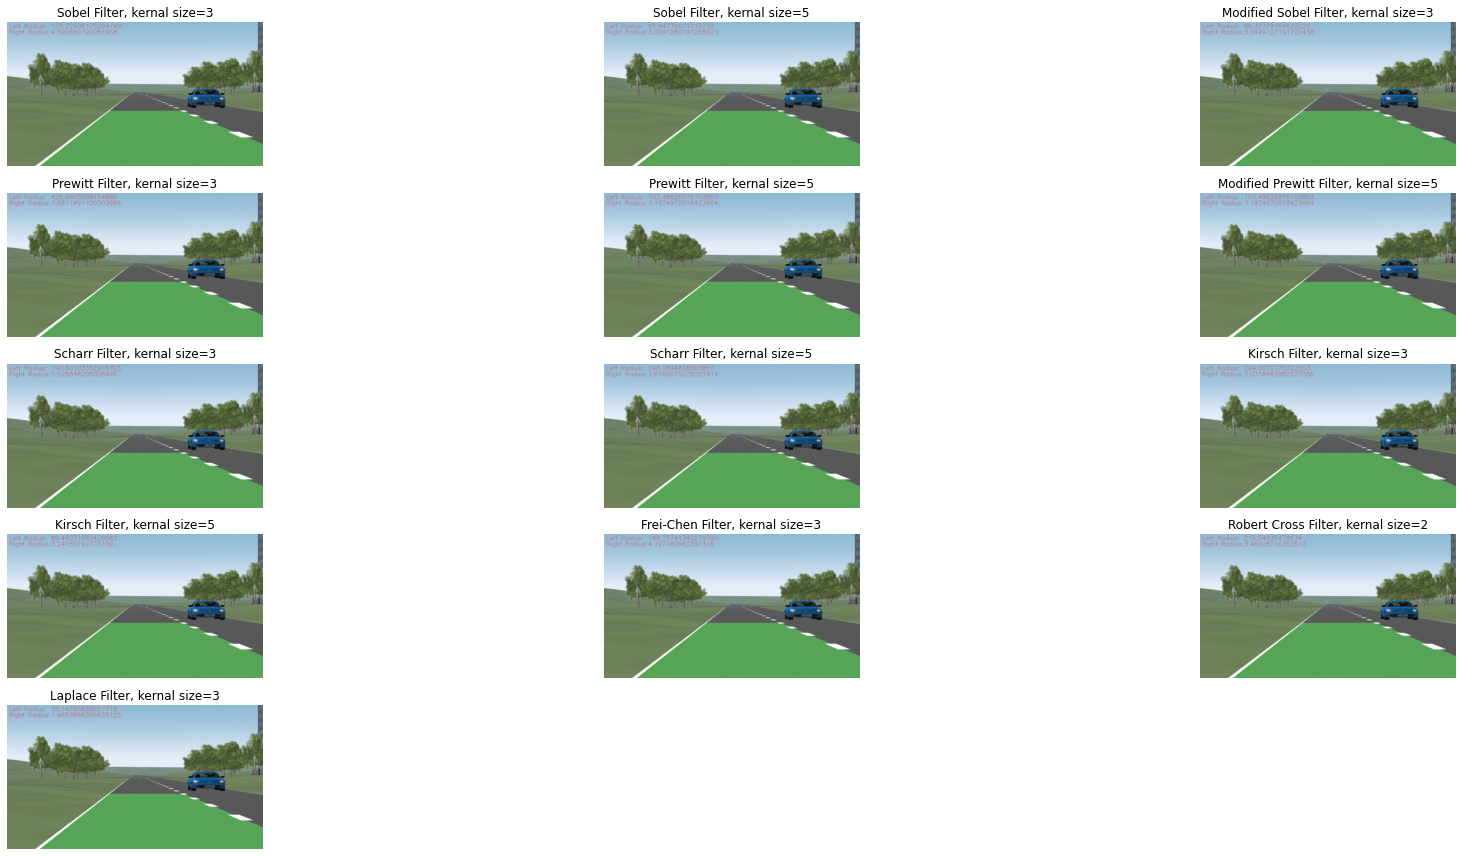

In [139]:
# load all test images
test_images = glob.glob("test/*jpg")
for image in test_images:
  detect_lane(image,filter_list,True)
  detect_lane(image,filter_list,False)